### Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import numpy as np  
import pandas as pd 

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

### Step 2:

**Data Uploading using Pandas Function**

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/chandanc5525/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
721,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,3,11.85
631,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,7,17.54
147,388.6,97.1,0.0,157.9,12.1,852.1,925.7,56,55.20
843,142.0,167.0,130.0,174.0,11.0,883.0,785.0,28,44.61
96,425.0,106.3,0.0,151.4,18.6,936.0,803.7,7,46.80
...,...,...,...,...,...,...,...,...,...
60,304.0,76.0,0.0,228.0,0.0,932.0,670.0,270,54.38
219,166.1,0.0,163.3,176.5,4.5,1058.6,780.1,3,10.76
505,491.0,26.0,123.0,201.0,3.9,822.0,699.0,7,37.92
193,233.8,0.0,94.6,197.9,4.6,947.0,852.2,100,34.56


### Step 3:

**Doing Exploratory Data Analysis [EDA] :--> **

1. Univariate Analysis 

2. Bi Variate Analysis

In [3]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing Values': df[i].isnull().sum(),
        'Unique Values': df[i].nunique(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Mode': df[i].mode()[0],
        'Standard Deviation': df[i].std(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing Values', 'Unique Values', 'Mean', 'Median', 'Mode', 'Standard Deviation', 'Kurtosis', 'IQR'], cmap='Reds')

,Feature,Type,Missing Values,Unique Values,Min,Max,Mean,Median,Mode,Standard Deviation,Kurtosis,IQR
0,cement,float64,0,278,102.000000,540.000000,281.167864,272.900000,362.600000,104.506364,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,359.400000,73.895825,22.000000,0.000000,86.279342,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,200.100000,54.188350,0.000000,0.000000,63.997004,-1.328746,118.300000
3,water,float64,0,195,121.800000,247.000000,181.567282,185.000000,192.000000,21.354219,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,32.200000,6.204660,6.400000,0.000000,5.973841,1.411269,10.200000
5,coarse_aggregate,float64,0,284,801.000000,1145.000000,972.918932,968.000000,932.000000,77.753954,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,992.600000,773.580485,779.500000,594.000000,80.175980,-0.102177,93.050000
7,age,int64,0,14,1.000000,365.000000,45.662136,28.000000,28.000000,63.169912,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,2.330000,82.600000,35.817961,34.445000,33.400000,16.705742,-0.313725,22.425000


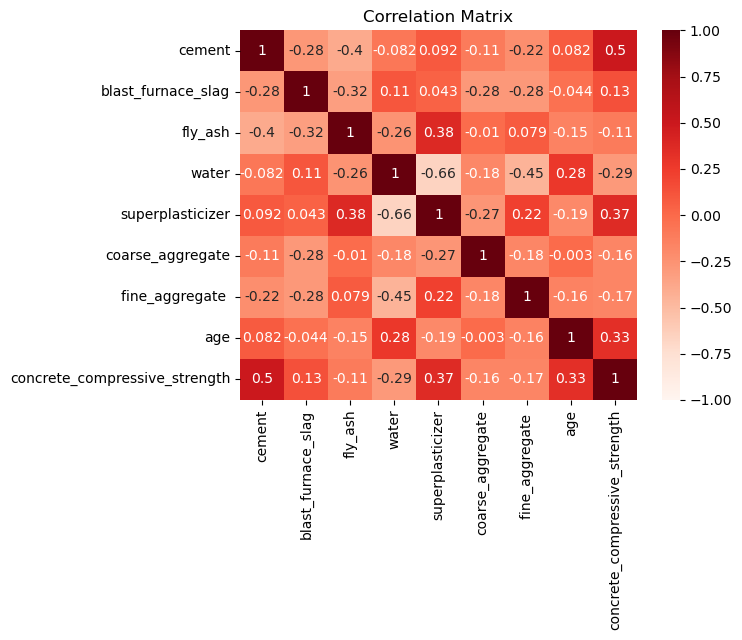

In [4]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ----> ['concrete_compressive_strength']

sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap = 'Reds')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Features and Create New Feature Based on Exisiting Feature ---> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

## **Feature Engineering:**

In [6]:
df['Composite_Ratio'] = 1/ ((df['cement'] + df['superplasticizer']+ df['blast_furnace_slag'])/(df['water']))

In [7]:
df['cement_to_water_ratio'] = 1 / (df['cement']/df['water'])

In [8]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                 -0.584858
cement_to_water_ratio           -0.500692
Name: concrete_compressive_strength, dtype: float64

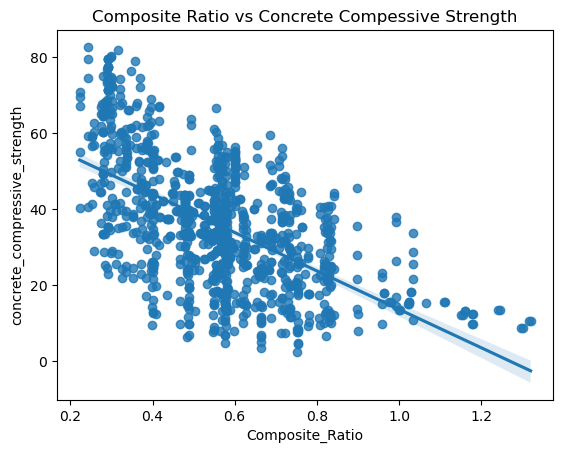

In [9]:
sns.regplot(x = df['Composite_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compessive Strength')
plt.show()

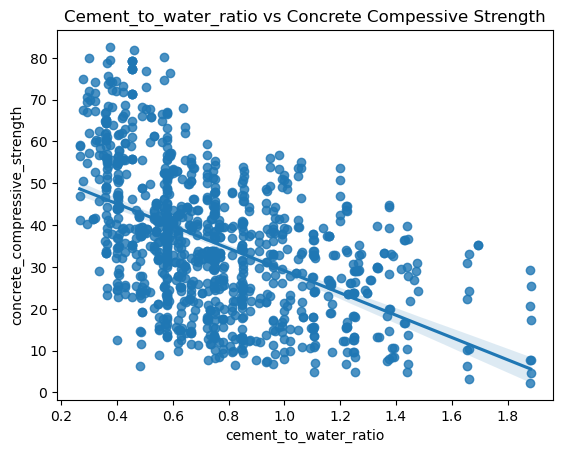

In [10]:
sns.regplot(x = df['cement_to_water_ratio'], y = df['concrete_compressive_strength'])
plt.title('Cement_to_water_ratio vs Concrete Compessive Strength')
plt.show()

In [11]:
df = df[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age','Composite_Ratio',
       'cement_to_water_ratio','concrete_compressive_strength']]

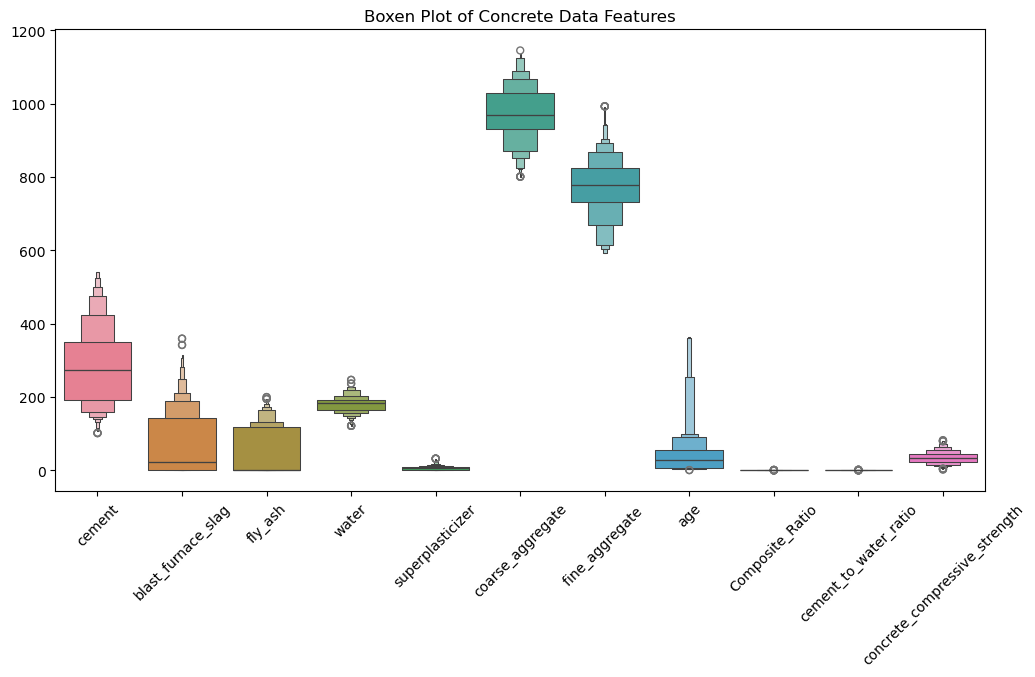

In [12]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Boxen Plot of Concrete Data Features")
plt.show()

In [13]:
# Use Variance Inflation Factor (VIF) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['concrete_compressive_strength'])  # All Independent Variables
X = X.assign(constant=1)     

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column from the result
vif_data = vif_data[vif_data["Feature"] != "constant"]

# Display VIF values
print(vif_data)

                 Feature        VIF
0                 cement  15.088325
1     blast_furnace_slag  10.976848
2                fly_ash   6.227664
3                  water   8.350680
4       superplasticizer   3.029723
5       coarse_aggregate   5.160920
6        fine_aggregate    7.073428
7                    age   1.123347
8        Composite_Ratio   9.196649
9  cement_to_water_ratio   7.295439


## **Data Insights:**

1. Higher Value of VIF Suggest Multi Colinearity. [VIF > 10] ---> Column Shows Multi Collinearity.

2. Such Columns Must be removed before applying any Regression Model.

## Step 4:

Splitting the dataset into training set and test set 
Also
Using Train and Test Split to Prevent Data Lekage.

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'concrete_compressive_strength',axis =1)
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
# Using Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scalaer = MinMaxScaler()

X_train = scalaer.fit_transform(X_train)
X_test = scalaer.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.6062392634611878

In [17]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

r2_score_DT = r2_score(y_test, y_pred_DT)

print(f'The R2 Score for Decision Tree Model: {r2_score_DT * 100} %')

The R2 Score for Decision Tree Model: 84.8599711406036 %


In [19]:
# Checking Model Performance

mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_DT = mean_squared_error(y_test, y_pred_DT)

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_DT = mean_absolute_error(y_test, y_pred_DT)

print(f'The Mean Squared Error for Linear Regression Model: {mse_LR}')

print(f'The Mean Squared Error for Decision Tree Model: {mse_DT}')

print(f'The Mean Absolute Error for Linear Regression Model: {mae_LR}')

print(f'The Mean Absolute Error for Decision Tree Model: {mae_DT}')

The Mean Squared Error for Linear Regression Model: 106.54152239337505
The Mean Squared Error for Decision Tree Model: 40.96502200647249
The Mean Absolute Error for Linear Regression Model: 8.108917548931982
The Mean Absolute Error for Decision Tree Model: 4.158640776699029


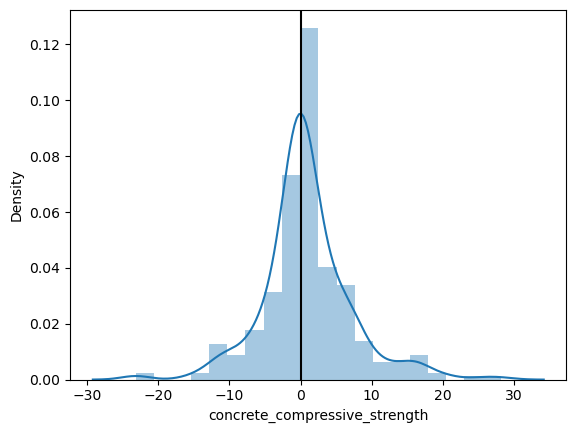

In [23]:
sns.distplot(y_test - y_pred_DT, bins = 20)
plt.axvline(0, color='k')